# UN Security Council representation by population

Recently, the topic of security council reform in the United Nations has been in the news and even [endorsed by the UN’s secretary general](https://www.gzeromedia.com/gzero-world-clips/guterres-now-is-the-time-for-un-security-council-reform). Most people know that the security council’s permanent members are the five nations that dominated the world’s security order after WWII: Russia, the United States, China, France, and the United Kingdom.

However, times have changed and this handful of wealthy countries no longer represents the only power brokers in global politics. What if the security council’s permanent members were instead composed of countries that contain the most human beings? While imperfect, it could represent a slight shift towards prioritizing the issues most people in the world actually care about.

To determine what countries those would be, we need to clearly define the question:

“What is the smallest number of countries, starting with the most populous, whose combined populations add up to at least half of the world's total population?”

One approach is to obtain a list of countries and their population counts, determine the 50% threshold of world population, sort the countries by descending order of population, and start adding countries from the sorted list until their combined population reaches the defined threshold.

## Step 1: Obtain data.

I used the World Bank Population totals as my source and imported as a table:

[World Bank Open Data](https://data.worldbank.org/indicator/SP.POP.TOTL)

## Step 2: Exploratory data analysis and data cleaning

Based on this table, it seems that not only recognized countries, but territories and entire regions are accounted for. For the purposes of this project, only countries that are UN member states need to be included, which excludes territories like Taiwan, Kosovo, and the Cook Islands.

To eliminate non-UN member states, I copied a list of UN member states in the adjacent column and then added a formula **=IF(ISNUMBER(MATCH(A1, B:B, 0)), A1, "")** for the third column that, would copy the country name from the World Bank dataset only if it was also found somewhere in the list of UN member states. Then I manually reviewed all the blank spaces in the third column to check to see if it was the result of different spelling (for example, St. Lucia vs Saint Lucia). Finally, I summed the total count of countries in the third column to see if it totaled 193 (total number of UN member states).

### Data cleaning - deleted blank spaces after verifying World Bank Country Name was not a UN member state

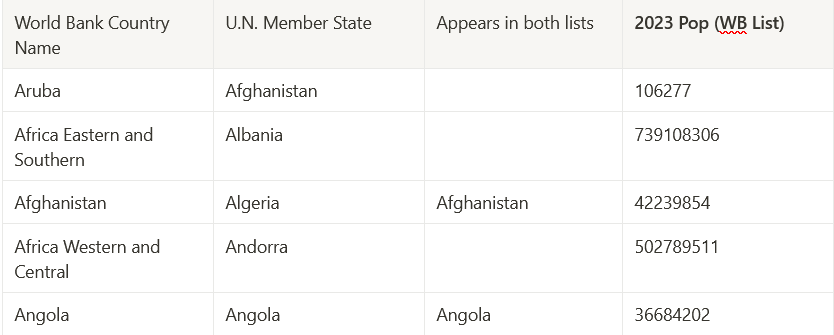

In [1]:
from IPython.display import Image, display
display(Image('un_table.PNG'))

Next, I set a filter to remove blanks from the “appears in both lists” column, leaving me with a clean list of UN member states and their populations.

## Step 3: Sum the countries from most to least populous until the 50% threshold is reached.

In [2]:
import pandas as pd

# Read the CSV file with no header row
df = pd.read_csv('population_totals.csv', header=None, names=['Country', 'Population'])

# Convert to dictionary
country_population = dict(zip(df['Country'], df['Population']))

# Calculate total population and 50% threshold
total_population = sum(country_population.values())
half_population = total_population / 2

# Sort countries by population (highest to lowest)
country_population = dict(sorted(country_population.items(), 
                               key=lambda x: x[1], 
                               reverse=True))

# Find smallest combination of countries with at least half of total population
current_population = 0
selected_countries = {}

for country, population in country_population.items():
    selected_countries[country] = population
    current_population += population
    if current_population >= half_population:
        break

# Output the selected countries and their populations
print(f"\nCountries needed to reach {half_population:,.0f} population (50% of world total): \n")
for country, pop in selected_countries.items():
    print(f"{country}: {pop:,.0f}")
print(f"\nTotal population of selected countries: {current_population:,.0f}")


Countries needed to reach 3,990,683,304 population (50% of world total): 

India: 1,428,627,663
China: 1,410,710,000
United States: 334,914,895
Indonesia: 277,534,122
Pakistan: 240,485,658
Nigeria: 223,804,632
Brazil: 216,422,446

Total population of selected countries: 4,132,499,416


What would the UN look like today if the security council permanent members were India, China, the United States, Indonesia, Pakistan, Nigeria, and Brazil? Maybe not that different. After all, the security council can veto resolutions: more members means more actors that can be an obstacle to progress. Additionally, the countries that struggle the most are those in the global south with smaller populations, according to António Guterres in the linked interview.

Nevertheless, it’s thought-provoking to see with data that more than half of human beings live in seven countries, and that their representation in the largest international organization is not any more than that of San Marino or Bhutan. Even more interesting is to see what kind of countries they are:

- Five of seven are in the so-called “global south”; the current permanent security council members have no nations in the global south
- They have an average democracy index of 5.4 based on [the Economist](https://ourworldindata.org/grapher/democracy-index-eiu) index; the current security council has an average democracy index of 5.7
- There are no European nations among this group (whereas the current security council permanents members include three: UK, France, and Russia). An African and a South American country would be represented for the first time as well.

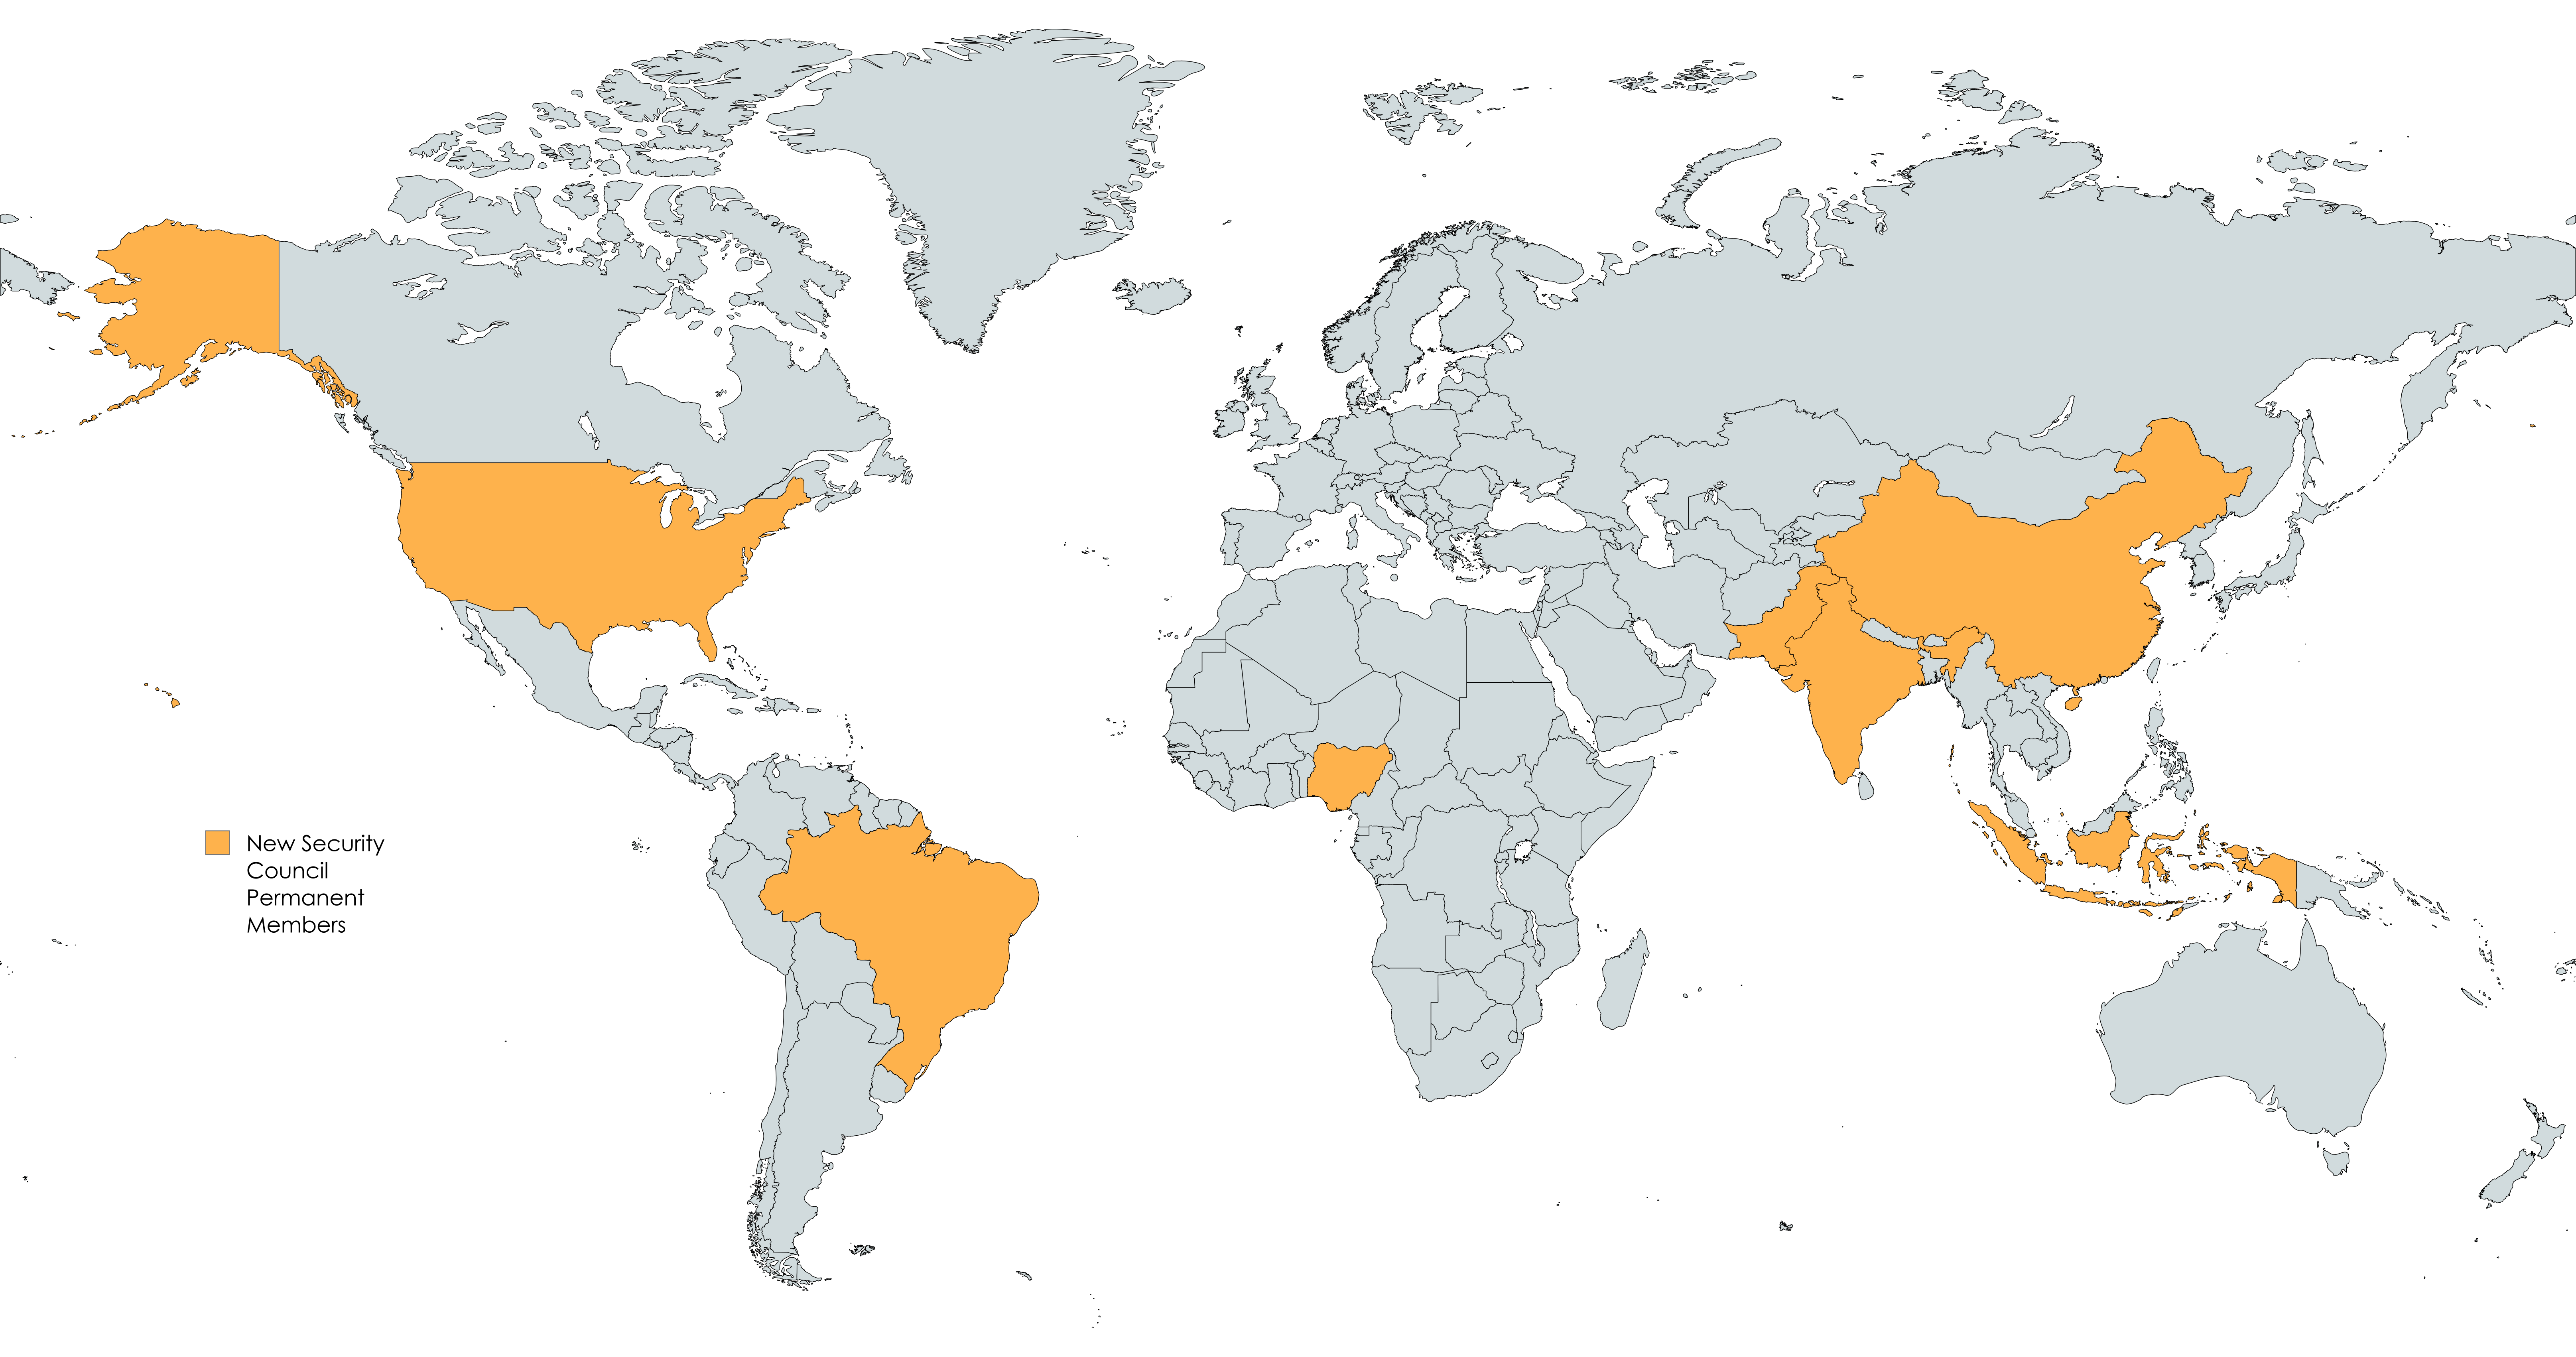

In [3]:
display(Image('mapchart.PNG'))